## Bayes error

- if we knew the distributions generating our data the Bayes Classifier would give the lowest possible generalization error
- refs [[bayes KNN](http://www.cs.cmu.edu/~epxing/Class/10701-10s/Lecture/lecture3.pdf)], [[no free lunch](http://www.santafe.edu/media/workingpapers/12-10-017.pdf)]

In [2]:
%run -i mlutils.py
%matplotlib inline


## Bayes classifier frontiers

Bayes classification frontier shown. Try values of $n$ such as 5, 10, 20, 100, 200, 500 and compare empirical error $\hat{\epsilon}$ with analytical Bayes error $\epsilon$

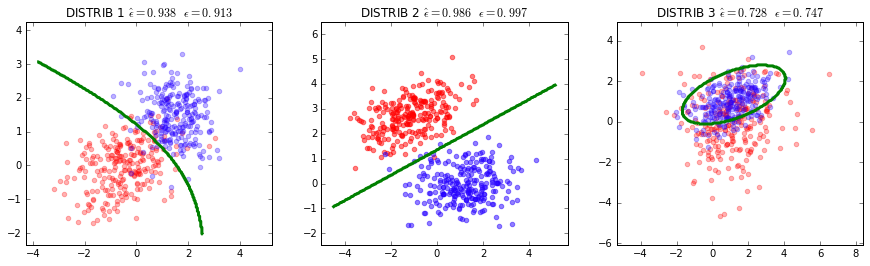

In [3]:
n=500

plt.figure(figsize=(15,4))
plt.subplot(131)
mc1 = Example_Bayes2DClassifier(mean0=[-0.5, 0], cov0=[[1.2, 0.3], [0.3, 0.5]],
                              mean1=[1.5,1.5], cov1=[[.7,0],[0,.5]])
X,y = mc1.sample(n)
plot_2Ddata_with_boundary(mc1.predict, X, y, line_width=3, line_color="green", dots_alpha=.3)
plt.title("DISTRIB 1 $\hat{\epsilon}=%.3f$"%mc1.score(X,y)+"  $\epsilon=%.3f$"%mc1.analytic_score())
plt.subplot(132)
mc2 = Example_Bayes2DClassifier(mean0=[-1.2, 2.7], cov0=[[1.2, 0.3], [0.3, 0.5]],
                               mean1=[ 1.2, 0], cov1=[[1.2,0],[0.3,.5]])
X,y = mc2.sample(n)
plot_2Ddata_with_boundary(mc2.predict, X, y, line_width=3, line_color="green",)
plt.title("DISTRIB 2 $\hat{\epsilon}=%.3f$"%mc2.score(X,y)+"  $\epsilon=%.3f$"%mc2.analytic_score())


plt.subplot(133)
mc3 = Example_Bayes2DClassifier(mean0=[1.0, 0], cov0=[[2, 0.3], [0.3, 2]],
                              mean1=[1.0,1.0], cov1=[[1.2, 0.3], [0.3, 0.5]])
X,y = mc3.sample(n)
plot_2Ddata_with_boundary(mc3.predict, X, y, line_width=3, line_color="green", dots_alpha=.3)
plt.title("DISTRIB 3 $\hat{\epsilon}=%.3f$"%mc3.score(X,y)+"  $\epsilon=%.3f$"%mc3.analytic_score())


## Exploring classification frontiers from KNeighbors

100%|█████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.01it/s]


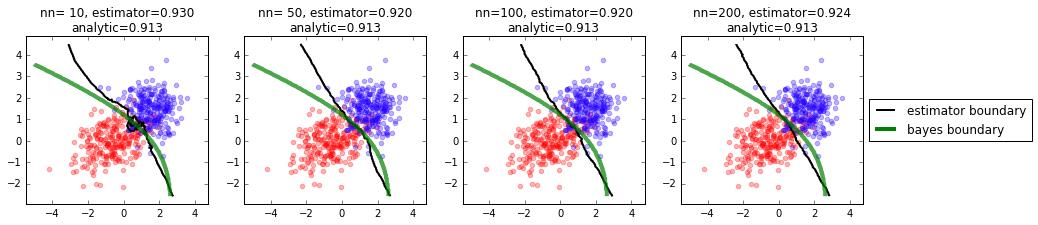

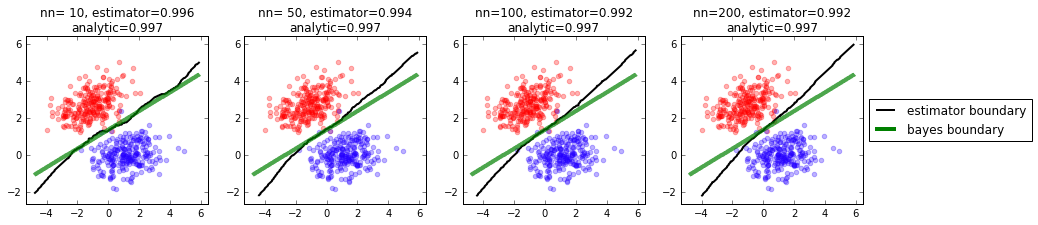

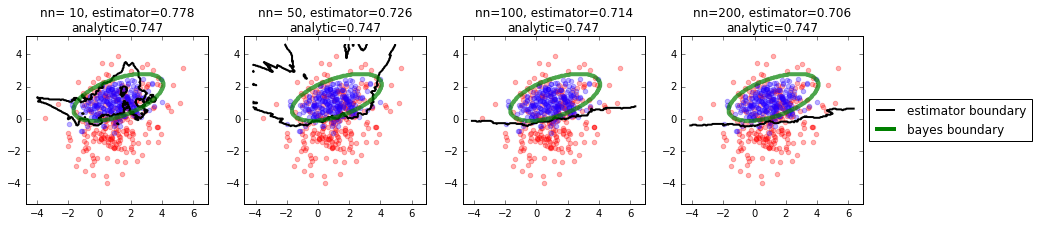

In [4]:
estimators = {"nn=%3d"%i: KNeighborsClassifier(i) for i in [10,50,100,200]}
for mc in [mc1, mc2, mc3]:
    plot_estimator_border(mc, estimators, n_samples=500)

100%|███████████████████████████████████████████████████████████████| 80/80 [00:11<00:00,  6.13it/s]


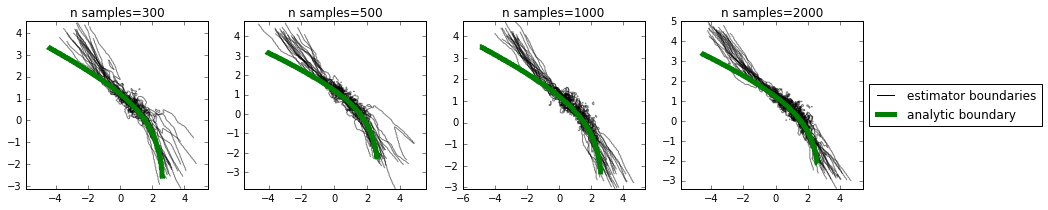

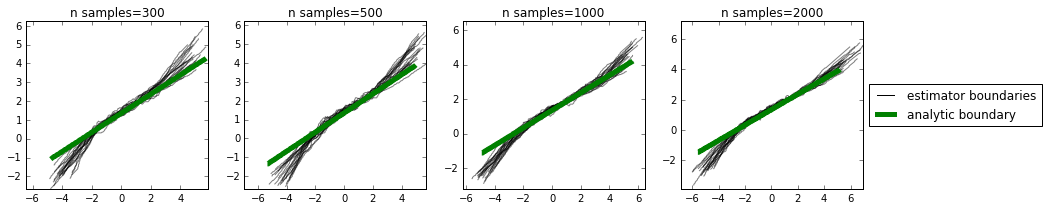

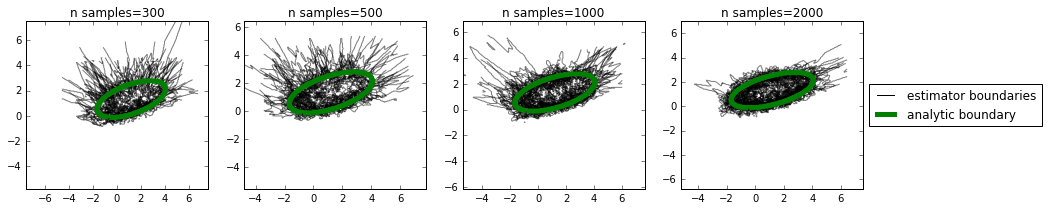

In [99]:
for mc in [mc1, mc2, mc3]:
    sample_borders(mc, KNeighborsClassifier(10), samples = [300,500,1000,2000], n_reps=20)

100%|███████████████████████████████████████████████████████████████| 80/80 [00:59<00:00,  1.27it/s]


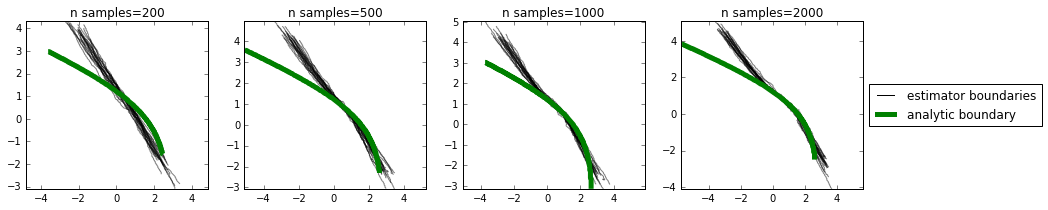

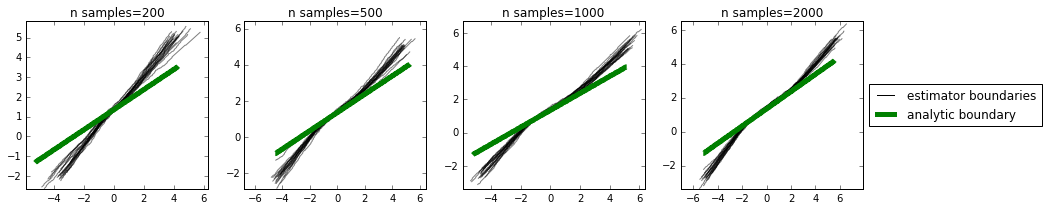

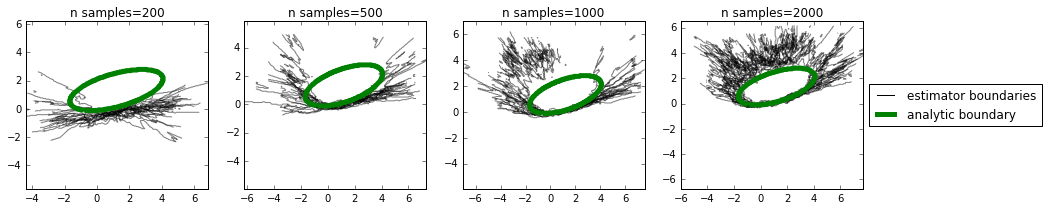

In [96]:
for mc in [mc1, mc2, mc3]:
    sample_borders(mc, KNeighborsClassifier(100), samples = [200,500,1000, 2000], n_reps=20)

100%|███████████████████████████████████████████████████████████████| 80/80 [02:06<00:00,  1.79s/it]


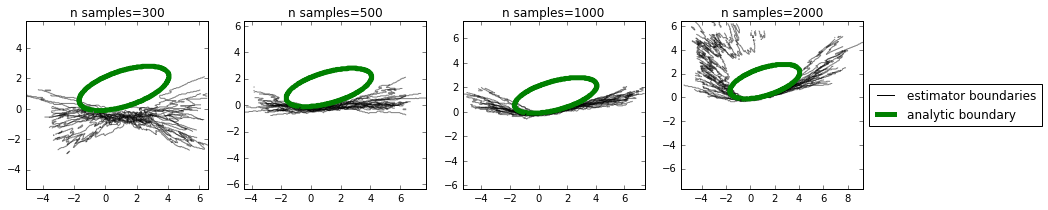

In [101]:
sample_borders(mc3, KNeighborsClassifier(200), samples = [300,500,1000,2000], n_reps=20)

## Exploring classification frontiers from SVMs

100%|█████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.56it/s]


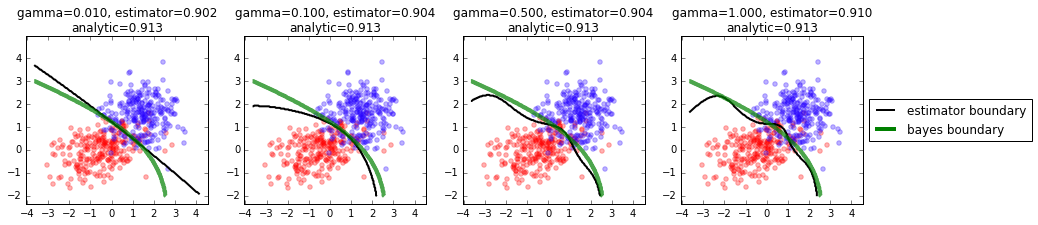

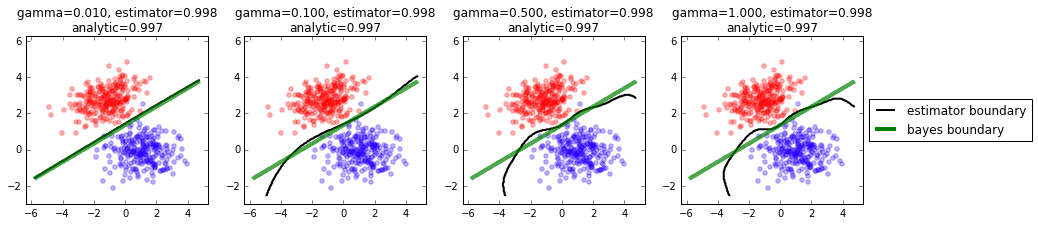

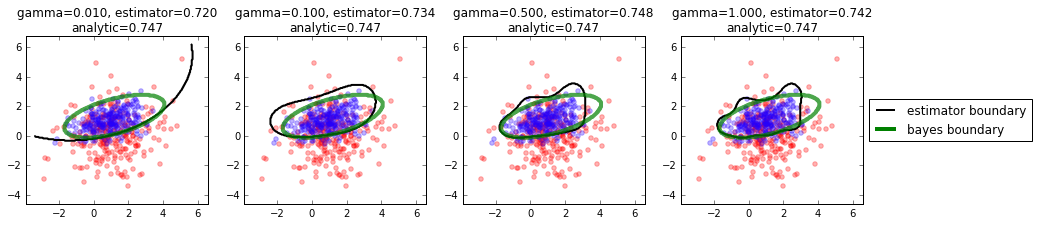

In [112]:
estimators = {"gamma=%.3f"%i: SVC(gamma=i) for i in [.01,.1,.5,1]}
for mc in [mc1, mc2, mc3]:
    plot_estimator_border(mc, estimators, n_samples=500)

100%|███████████████████████████████████████████████████████████████| 80/80 [00:42<00:00,  1.11s/it]


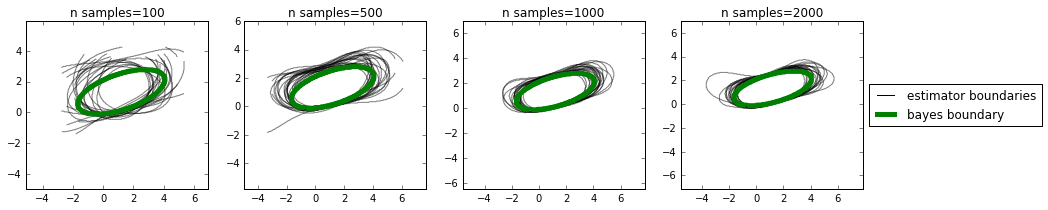

In [115]:
sample_borders(mc3, SVC(gamma=.1), samples = [100,500,1000,2000], n_reps=20)

## Exploring frontiers with:

- Logistic Regression
- Decission Tree
- Random Forests
- Multilayer Perceptron

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
estimators = {"logreg": LogisticRegression(), "rforest": RandomForestClassifier(), 
              "dtree": DecisionTreeClassifier(), "MLP": MLPClassifier()}
for mc in [mc1, mc2, mc3]:
    plot_estimator_border(mc, estimators, n_samples=500)

100%|███████████████████████████████████████████████████████████████| 80/80 [00:02<00:00, 31.01it/s]


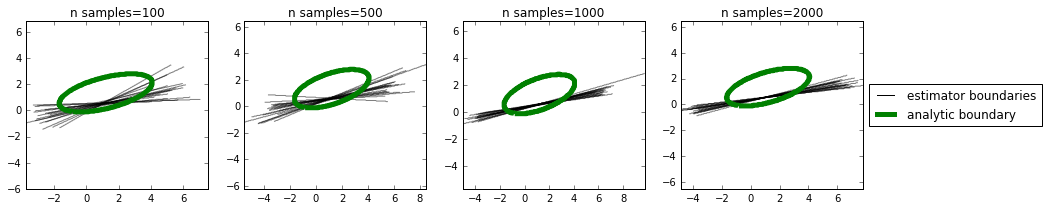

In [106]:
sample_borders(mc3, LogisticRegression(), samples = [100,500,1000, 2000], n_reps=20)

100%|███████████████████████████████████████████████████████████████| 80/80 [00:07<00:00,  9.07it/s]


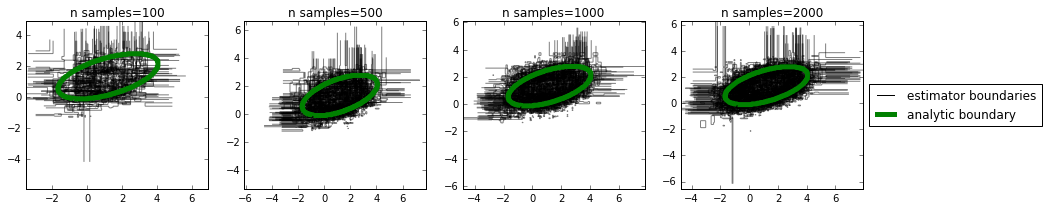

In [108]:
sample_borders(mc3, RandomForestClassifier(), samples = [100,500,1000, 2000], n_reps=20)

100%|█████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.23it/s]


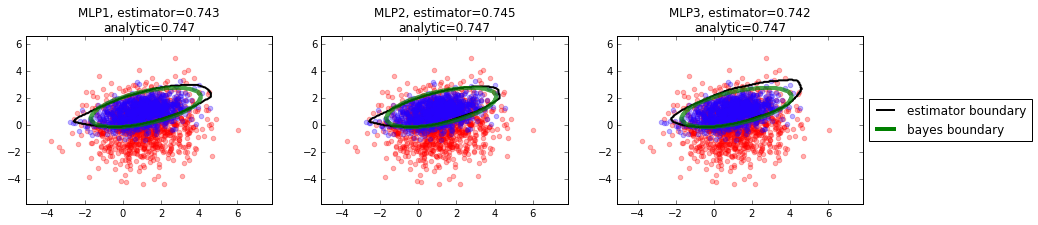

In [15]:
plot_estimator_border(mc3, {"MLP1": MLPClassifier(), "MLP2": MLPClassifier(), "MLP3": MLPClassifier()}, n_samples=2000)

100%|███████████████████████████████████████████████████████████████| 80/80 [01:32<00:00,  1.47s/it]


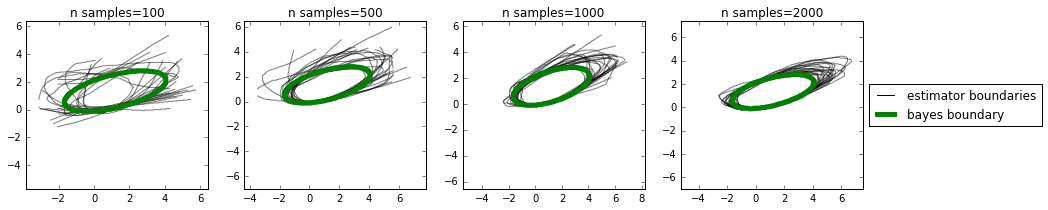

In [10]:
sample_borders(mc3, MLPClassifier(), samples = [100,500,1000, 2000], n_reps=20)